In [47]:
# ЗАДАНИЕ 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [48]:
# Создайте датафреймы X и y из этих данных.
data = boston.data
price = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(price, columns=['price'])


In [56]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
from sklearn.model_selection import train_test_split
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)
data.shape


(506, 13)

In [57]:
# Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_test_scaled.shape

(102, 13)

In [58]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = model.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

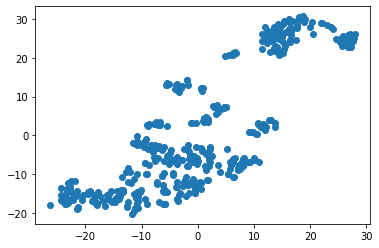

In [64]:

# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])


In [66]:
## ЗАДАНИЕ 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
labels_train = kmeans_model.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

1    191
0    128
2     85
dtype: int64

Text(15, 15, 'Кластер 2')

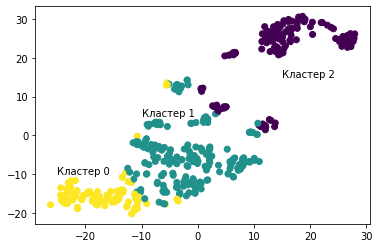

In [83]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.text(-25, -10, 'Кластер 0')
plt.text(-10, 5, 'Кластер 1')
plt.text(15, 15, 'Кластер 2')

In [67]:
# Вычислите средние значения price и CRIM в разных кластерах.
X_train.loc[labels_train==0, 'CRIM'].mean()


10.715219062500003

In [27]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.42166020942408367

In [68]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.0721184705882353

In [69]:
## ЗАДАНИЕ 3
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
labels_test = kmeans_model.predict(X_test_scaled)
pd.value_counts(labels_test)

1    51
0    35
2    16
dtype: int64

Text(75, 50, 'Кластер 2')

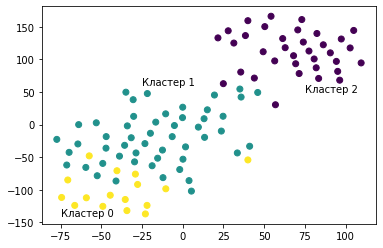

In [84]:
X_test_tsne = model.fit_transform(X_test_scaled)
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c=labels_test)
plt.text(-75, -140, 'Кластер 0')
plt.text(-25, 60, 'Кластер 1')
plt.text(75, 50, 'Кластер 2')

In [73]:
X_test.loc[labels_test==0, 'CRIM'].mean()

10.165531142857143

In [74]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.26607882352941176

In [75]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.062060000000000004